<a href="https://colab.research.google.com/github/devika-kla/Image-Noise-Removal/blob/main/Main_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [2]:
# Reading Noisy Image
image = imread("/content/drive/MyDrive/MATHS assign/Noisy_Smithsonian_Castle.jpg")

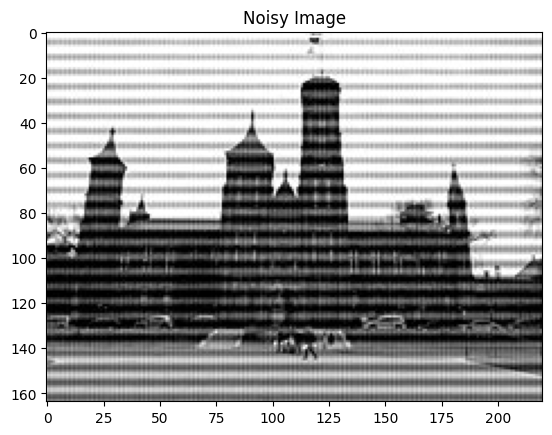

In [3]:
# Display the Noisy Image
plt.imshow(image, cmap='gray')
plt.title("Noisy Image")
plt.show()

In [4]:
rows, cols = image.shape
print("Shape of Image : ",rows,"*",cols)

Shape of Image :  164 * 220


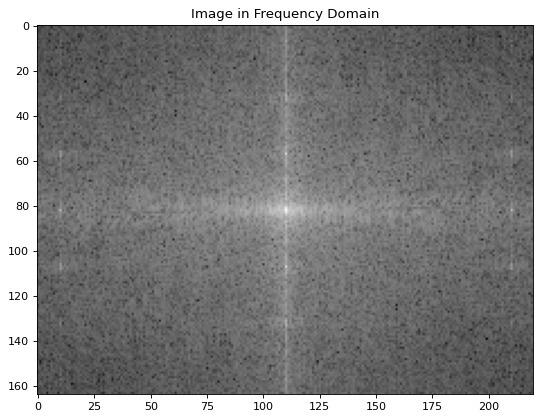

In [5]:
# Perform Fast Fourier Transform on Image

f_image = np.fft.fft2(image)
magnitude_spectrum = np.fft.fftshift(f_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(magnitude_spectrum)+1), cmap='gray')
plt.title("Image in Frequency Domain")
plt.show()

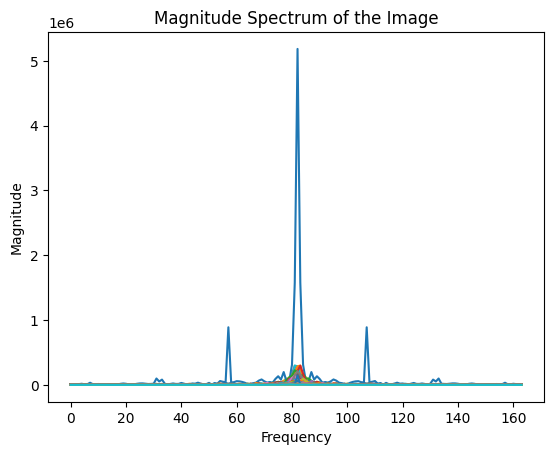

In [6]:
plt.plot(np.abs(magnitude_spectrum)) #Plotting the Magnitude Spectrum of the Image
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of the Image")
plt.show()

(Text(0.5, 1.0, 'Filtered Magnitude Spectrum'), (-0.5, 219.5, 163.5, -0.5))

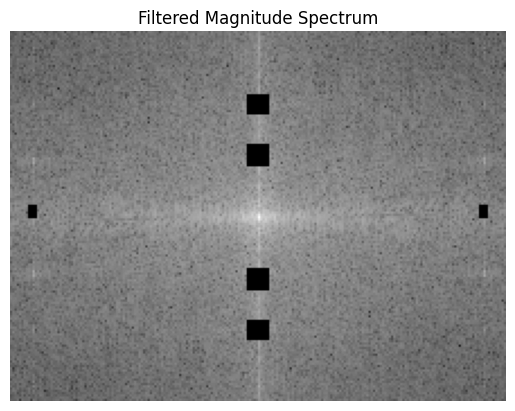

In [7]:
import cv2

# Define a filter in the frequency domain
crow,ccol = rows//2 , cols//2

mask = np.ones((rows, cols), dtype=np.uint8)
mask[105:115, 105:115] = 0
mask[50:60, 105:115] = 0
mask[28:37, 105:115] = 0
mask[128:137, 105:115] = 0
mask[77:83, 8:12] = 0
mask[77:83, 208:212] = 0
n = magnitude_spectrum
n[105:115, 105:115],n[50:60, 105:115],n[28:37, 105:115]=0,0,0
n[128:137, 105:115],n[77:83, 8:12],n[77:83, 208:212]=0,0,0

plt.imshow(np.log(abs(n)+1), cmap='gray')
plt.title('Filtered Magnitude Spectrum'), plt.axis('off')

<ipython-input-8-0db0eb037cb9>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_image = (filtered_image).astype(np.uint8)


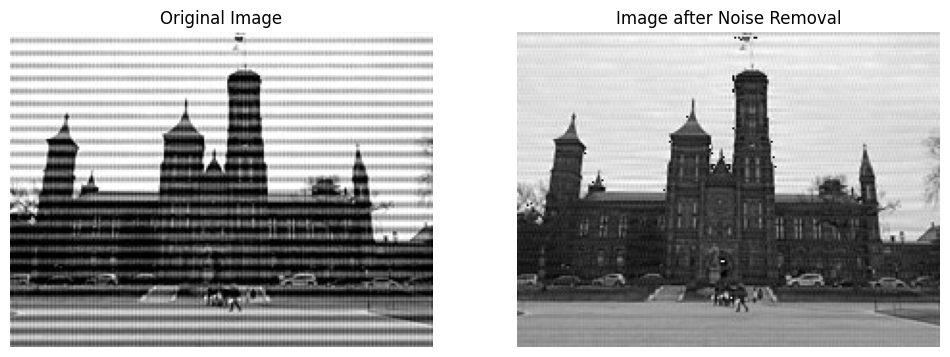

In [8]:
# Apply the filter in the frequency domain
fshift = magnitude_spectrum*mask

# Inverse Fourier Transform to obtain the filtered image
f_ishift = np.fft.ifftshift(fshift)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = (filtered_image).astype(np.uint8)

# Display the Original and filtered images
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Image after Noise Removal'), plt.axis('off')
plt.show()
